In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression

In [3]:
df_day1_aspirin = pd.read_csv("raw_day1\day1_DILL-Aspirin_raw.csv")
df_day1_ch2cl2 = pd.read_csv("raw_day1\day1_DILL-CH2Cl2_raw.csv")
df_day1_etac = pd.read_csv("raw_day1\day1_DILL-ETAC_raw.csv")
df_day1_etoh = pd.read_csv("raw_day1\day1_DILL-EtOH_raw.csv")
day1_list = [df_day1_aspirin, df_day1_ch2cl2, df_day1_etac, df_day1_etoh]

df_day2_aspirin = pd.read_csv("raw_day2\day2_DILL-Aspirin_raw.csv")
df_day2_ch2cl2 = pd.read_csv("raw_day2\day2_DILL-CH2Cl2_raw.csv")
df_day2_etac = pd.read_csv("raw_day2\day2_DILL-ETAC_raw.csv")
df_day2_etoh = pd.read_csv("raw_day2\day2_DILL-EtOH_raw.csv")
day2_list = [df_day2_aspirin, df_day2_ch2cl2, df_day2_etac, df_day2_etoh]

In [4]:
df_day2_aspirin

,con,N1,N2,N3,Average,N1_calc,N2_calc,N3_calc,MeanN,SDN
0,0.0,0.501,0.410,0.418,0.443000,113.09260,92.55079,94.35666,100.00000,9.287140
1,0.3,0.239,0.231,0.189,0.219667,53.95034,52.14447,42.66366,49.58616,4.950153
2,1.0,0.162,0.191,0.149,0.167333,36.56885,43.11512,33.63431,37.77276,3.963038
3,3.0,0.155,0.155,0.114,0.141333,34.98871,34.98871,25.73363,31.90369,4.362886
4,10.0,-0.007,-0.005,-0.007,-0.006330,-1.58014,-1.12867,-1.58014,-1.42965,0.212824


## viability,SD,bar graph, ic50

In [5]:
day1_list

[    con     N1     N2     N3   Average    N1_calc   N2_calc    N3_calc  \
 0   0.0  0.385  0.356  0.339  0.360000  106.94440  98.88889  94.166670   
 1   0.3  0.392  0.334  0.297  0.341000  108.88890  92.77778  82.500000   
 2   1.0  0.334  0.327  0.259  0.306667   92.77778  90.83333  71.944440   
 3   3.0  0.226  0.227  0.219  0.224000   62.77778  63.05556  60.833330   
 4  10.0 -0.006  0.000  0.000 -0.002667   -1.66667   0.00000  -0.555556   
 
        MeanN        SDN  
 0  100.00000   5.275341  
 1   94.72222  10.860600  
 2   85.18519   9.396209  
 3   62.22222   0.988618  
 4   -0.74074   0.692900  ,
     con     N1     N2     N3   Average    N1_calc    N2_calc   N3_calc  \
 0   0.0  0.385  0.356  0.339  0.360000  106.94440   98.88889  94.16667   
 1   0.3  0.363  0.388  0.344  0.365000  100.83330  107.77780  95.55556   
 2   1.0  0.277  0.262  0.277  0.272000   76.94444   72.77778  76.94444   
 3   3.0  0.270  0.278  0.359  0.302333   75.00000   77.22222  99.72222   
 4  10.0  

In [6]:
for df in day1_list:
    df.clip(lower=0, inplace=True)
    df["day"] = 1

In [7]:
for df in day2_list:
    df.clip(lower=0, inplace=True)
    df["day"] = 2

In [8]:
df_day1_ch2cl2

,con,N1,N2,N3,Average,N1_calc,N2_calc,N3_calc,MeanN,SDN,day
0,0.0,0.385,0.356,0.339,0.360000,106.94440,98.88889,94.16667,100.000000,5.275341,1
1,0.3,0.363,0.388,0.344,0.365000,100.83330,107.77780,95.55556,101.388889,5.005141,1
2,1.0,0.277,0.262,0.277,0.272000,76.94444,72.77778,76.94444,75.555556,1.964186,1
3,3.0,0.270,0.278,0.359,0.302333,75.00000,77.22222,99.72222,83.981481,11.167300,1
4,10.0,0.105,0.084,0.090,0.093000,29.16667,23.33333,25.00000,25.833333,2.453267,1


In [9]:
df_d1d2_aspirin = pd.concat([df_day1_aspirin, df_day2_aspirin], ignore_index=True)
df_d1d2_aspirin
df_d1d2_aspirin = df_d1d2_aspirin.pivot(index="con", columns="day", values=["MeanN", "SDN"])
df_d1d2_aspirin.columns = ["Day1", "Day2", "SD1", "SD2"]
df_d1d2_aspirin["substance"] = "aspirin"
df_d1d2_aspirin = df_d1d2_aspirin.reset_index()

df_d1d2_ch2cl2 = pd.concat([df_day1_ch2cl2, df_day2_ch2cl2], ignore_index=True)
df_d1d2_ch2cl2
df_d1d2_ch2cl2 = df_d1d2_ch2cl2.pivot(index="con", columns="day", values=["MeanN", "SDN"])
df_d1d2_ch2cl2.columns = ["Day1", "Day2", "SD1", "SD2"]
df_d1d2_ch2cl2["substance"] = "ch2cl2"
df_d1d2_ch2cl2 = df_d1d2_ch2cl2.reset_index()

df_d1d2_etac = pd.concat([df_day1_etac, df_day2_etac], ignore_index=True)
df_d1d2_etac
df_d1d2_etac = df_d1d2_etac.pivot(index="con", columns="day", values=["MeanN", "SDN"])
df_d1d2_etac.columns = ["Day1", "Day2", "SD1", "SD2"]
df_d1d2_etac["substance"] = "etac"
df_d1d2_etac = df_d1d2_etac.reset_index()

df_d1d2_etoh = pd.concat([df_day1_etoh, df_day2_etoh], ignore_index=True)
df_d1d2_etoh
df_d1d2_etoh = df_d1d2_etoh.pivot(index="con", columns="day", values=["MeanN", "SDN"])
df_d1d2_etoh.columns = ["Day1", "Day2", "SD1", "SD2"]
df_d1d2_etoh["substance"] = "etoh"
df_d1d2_etoh = df_d1d2_etoh.reset_index()

viability_sd_list = [df_d1d2_aspirin, df_d1d2_ch2cl2, df_d1d2_etac, df_d1d2_etoh]

In [10]:
viability_sd_list

[    con       Day1       Day2        SD1       SD2 substance
 0   0.0  100.00000  100.00000   5.275341  9.287140   aspirin
 1   0.3   94.72222   49.58616  10.860600  4.950153   aspirin
 2   1.0   85.18519   37.77276   9.396209  3.963038   aspirin
 3   3.0   62.22222   31.90369   0.988618  4.362886   aspirin
 4  10.0    0.00000    0.00000   0.692900  0.212824   aspirin,
     con        Day1        Day2        SD1       SD2 substance
 0   0.0  100.000000  100.000000   5.275341  9.287140    ch2cl2
 1   0.3  101.388889   56.734387   5.005141  5.811880    ch2cl2
 2   1.0   75.555556   56.057186   1.964186  5.651862    ch2cl2
 3   3.0   83.981481   48.683220  11.167300  4.043651    ch2cl2
 4  10.0   25.833333   11.587660   2.453267  0.532059    ch2cl2,
     con       Day1       Day2       SD1       SD2 substance
 0   0.0  100.00000  100.00000  5.275341  9.287140      etac
 1   0.3   93.88889   65.16178  3.564514  1.048035      etac
 2   1.0  104.35190   42.13695  3.857901  4.493303      eta

In [11]:
# Extract Day1 and SD1 data for each substance
day1_dfs = []
for df in viability_sd_list:
    substance_col = df.columns[-1]  # Last column is the substance identifier
    substance_name = df[substance_col].iloc[0]
    df_day1 = df[['con', 'Day1', 'SD1']].copy()
    df_day1.rename(columns={'Day1': f'{substance_name}_Day1', 'SD1': f'{substance_name}_SD1'}, inplace=True)
    day1_dfs.append(df_day1)

# Merge all Day1 data on 'con'
merged_day1 = day1_dfs[0]
for df in day1_dfs[1:]:
    merged_day1 = pd.merge(merged_day1, df, on='con')

merged_day1


,con,aspirin_Day1,aspirin_SD1,ch2cl2_Day1,ch2cl2_SD1,etac_Day1,etac_SD1,etoh_Day1,etoh_SD1
0,0.0,100.00000,5.275341,100.000000,5.275341,100.00000,5.275341,100.00000,5.275341
1,0.3,94.72222,10.860600,101.388889,5.005141,93.88889,3.564514,92.03704,10.379460
2,1.0,85.18519,9.396209,75.555556,1.964186,104.35190,3.857901,87.80737,15.431600
3,3.0,62.22222,0.988618,83.981481,11.167300,102.87040,5.984949,93.14815,2.032824
4,10.0,0.00000,0.692900,25.833333,2.453267,53.33333,7.425903,31.75926,2.271823


### line graph concentration&viability each substance

In [12]:
df_d1d2_aspirin_forline = df_d1d2_aspirin.drop(columns=["substance"])
df_d1d2_aspirin_forline

,con,Day1,Day2,SD1,SD2
0,0.0,100.00000,100.00000,5.275341,9.287140
1,0.3,94.72222,49.58616,10.860600,4.950153
2,1.0,85.18519,37.77276,9.396209,3.963038
3,3.0,62.22222,31.90369,0.988618,4.362886
4,10.0,0.00000,0.00000,0.692900,0.212824


### line graph concentration&viability all

In [13]:
df = pd.concat(viability_sd_list, ignore_index=True)
df


,con,Day1,Day2,SD1,SD2,substance
0,0.0,100.000000,100.000000,5.275341,9.287140,aspirin
1,0.3,94.722220,49.586160,10.860600,4.950153,aspirin
2,1.0,85.185190,37.772760,9.396209,3.963038,aspirin
3,3.0,62.222220,31.903690,0.988618,4.362886,aspirin
4,10.0,0.000000,0.000000,0.692900,0.212824,aspirin
5,0.0,100.000000,100.000000,5.275341,9.287140,ch2cl2
6,0.3,101.388889,56.734387,5.005141,5.811880,ch2cl2
7,1.0,75.555556,56.057186,1.964186,5.651862,ch2cl2
8,3.0,83.981481,48.683220,11.167300,4.043651,ch2cl2
9,10.0,25.833333,11.587660,2.453267,0.532059,ch2cl2


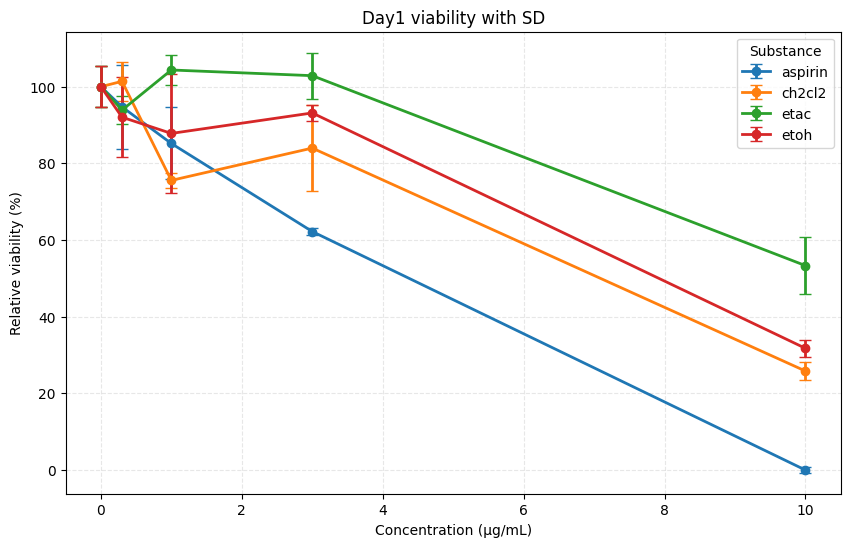

In [14]:
df = pd.concat(viability_sd_list, ignore_index=True)

# ----------------------
# 2) Plot line + SD
# ----------------------
plt.figure(figsize=(10,6))

for substance, subdf in df.groupby("substance"):
    plt.errorbar(
        subdf["con"],
        subdf["Day1"],
        yerr=subdf["SD1"],
        marker="o",
        capsize=4,
        linewidth=2,
        label=substance
    )

plt.xlabel("Concentration (µg/mL)")
plt.ylabel("Relative viability (%)")
plt.title("Day1 viability with SD")
plt.legend(title="Substance")
plt.grid(True, linestyle="--", alpha=0.3)

plt.show()

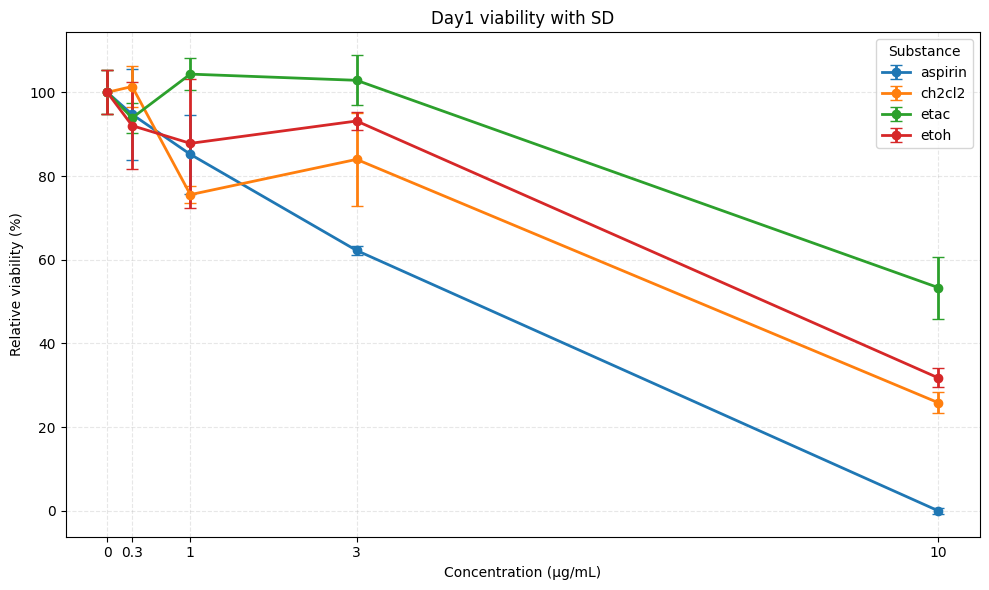

In [15]:
df = pd.concat(viability_sd_list, ignore_index=True)

# ----------------------
# 2) Plot line + SD
# ----------------------
plt.figure(figsize=(10,6))

for substance, subdf in df.groupby("substance"):
    plt.errorbar(
        subdf["con"],
        subdf["Day1"],
        yerr=subdf["SD1"],
        marker="o",
        capsize=4,
        linewidth=2,
        label=substance
    )

plt.xlabel("Concentration (µg/mL)")
plt.ylabel("Relative viability (%)")
plt.title("Day1 viability with SD")
plt.legend(title="Substance")
plt.grid(True, linestyle="--", alpha=0.3)

# Set x-axis ticks to show all concentration values as integers
x_values = sorted(df["con"].unique())
plt.xticks(x_values, [int(x) if x == int(x) else x for x in x_values])

plt.tight_layout()
plt.show()

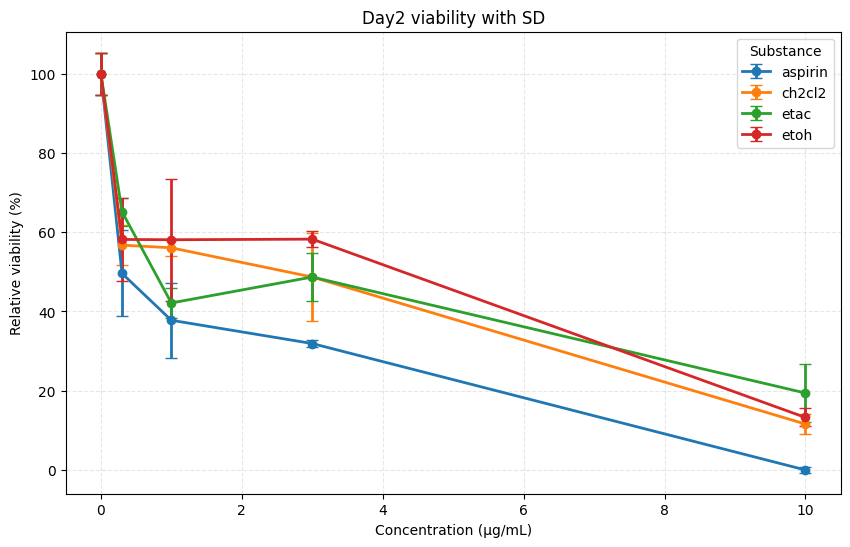

In [16]:
df = pd.concat(viability_sd_list, ignore_index=True)

# ----------------------
# 2) Plot line + SD
# ----------------------
plt.figure(figsize=(10,6))

for substance, subdf in df.groupby("substance"):
    plt.errorbar(
        subdf["con"],
        subdf["Day2"],
        yerr=subdf["SD1"],
        marker="o",
        capsize=4,
        linewidth=2,
        label=substance
    )

plt.xlabel("Concentration (µg/mL)")
plt.ylabel("Relative viability (%)")
plt.title("Day2 viability with SD")
plt.legend(title="Substance")
plt.grid(True, linestyle="--", alpha=0.3)

plt.show()

In [17]:
def sigmoid_4pl(x, bottom, top, ic50, hill):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill)

df = pd.concat(viability_sd_list, ignore_index=True)
df["con"] = df["con"].replace(0, 0.01)   # ป้องกัน log(0)

equations = {}   # เก็บสมการ

for substance, subdf in df.groupby("substance"):

    subdf = subdf.sort_values("con")
    x = subdf["con"].values
    y = subdf["Day1"].values

    p0 = [min(y), max(y), np.median(x), -1]  # initial guess

    try:
        popt, pcov = curve_fit(
            sigmoid_4pl,
            x, y, p0=p0,
            maxfev=10000
        )

        bottom, top, ic50, hill = popt

        # ทำเป็นสมการ string แบบ paper
        eq = (
            f"{substance}:  y = {bottom:.3f} + "
            f"({top:.3f} - {bottom:.3f}) / [1 + (x/{ic50:.4f})^{hill:.3f}]"
        )

        equations[substance] = eq

    except:
        equations[substance] = f"{substance}: sigmoid fit failed"

# แสดงผลสมการทั้งหมด
for key, val in equations.items():
    print(val)

aspirin:  y = -969.912 + (100.262 - -969.912) / [1 + (x/141.2082)^0.857]
ch2cl2:  y = -156334.764 + (97.811 - -156334.764) / [1 + (x/24856.9919)^0.985]
etac:  y = -1.733 + (100.278 - -1.733) / [1 + (x/10.1212)^13.252]
etoh:  y = 93.301 + (-2582.655 - 93.301) / [1 + (x/22.0801)^-4.733]


C:\Users\Asus\AppData\Local\Temp\ipykernel_49368\2165438706.py:2: RuntimeWarning: invalid value encountered in power
  return bottom + (top - bottom) / (1 + (x / ic50)**hill)


C:\Users\Asus\AppData\Local\Temp\ipykernel_49368\3301227134.py:7: RuntimeWarning: invalid value encountered in power
  return bottom + (top - bottom) / (1 + (x / ic50)**hill)


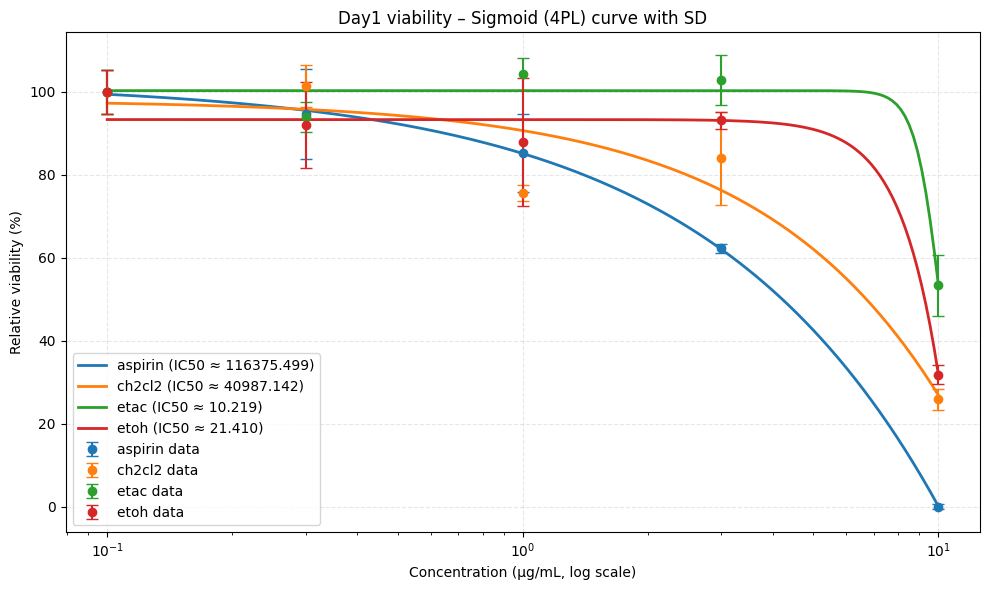

aspirin:  y = 93.301 + (-2582.655 - 93.301) / [1 + (x/22.0801)^-4.733]
ch2cl2:  y = 93.301 + (-2582.655 - 93.301) / [1 + (x/22.0801)^-4.733]
etac:  y = 93.301 + (-2582.655 - 93.301) / [1 + (x/22.0801)^-4.733]
etoh:  y = 93.301 + (-2582.655 - 93.301) / [1 + (x/22.0801)^-4.733]


In [20]:
from scipy.optimize import curve_fit

# ------------------
# 4-parameter logistic function (4PL)
# ------------------
def sigmoid_4pl(x, bottom, top, ic50, hill):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill)

# ------------------
# เตรียม df
# ------------------
df = pd.concat(viability_sd_list, ignore_index=True)
equations = {}   # เก็บสมการ

# ป้องกัน log(0)
df["con"] = df["con"].replace(0, 0.1)

plt.figure(figsize=(10,6))

colors = {
    "aspirin": "tab:blue",
    "ch2cl2": "tab:orange",
    "etac": "tab:green",
    "etoh": "tab:red"
}

for substance, subdf in df.groupby("substance"):

    # sort X ก่อนฟิต
    subdf = subdf.sort_values("con")
    x = subdf["con"].values
    y = subdf["Day1"].values
    yerr = subdf["SD1"].values

    # initial guess
    p0 = [min(y), max(y), np.median(x), -1]

    # ฟิต sigmoid
    try:
        popt, pcov = curve_fit(
            sigmoid_4pl,
            x, y, p0=p0,
            maxfev=10000
        )
        x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 200)
        y_fit = sigmoid_4pl(x_fit, *popt)
        label_curve = f"{substance} (IC50 ≈ {popt[2]:.3f})"

        # plot curve
        plt.plot(x_fit, y_fit, color=colors[substance], linewidth=2, label=label_curve)



        # equation dictionary

        # ทำเป็นสมการ string แบบ paper
        eq = (
            f"{substance}:  y = {bottom:.3f} + "
            f"({top:.3f} - {bottom:.3f}) / [1 + (x/{ic50:.4f})^{hill:.3f}]"
        )
        equations[substance] = eq

    except:
        print(f"⚠️ {substance}: sigmoid fit failed, plot only raw data.")
        pass

    # plot points + SD
    plt.errorbar(
        x, y, yerr=yerr,
        fmt="o",
        color=colors[substance],
        capsize=4,
        markersize=6,
        label=substance + " data"
    )

# ------------------
# Final graph style
# ------------------
plt.xscale("log")
plt.xlabel("Concentration (µg/mL, log scale)")
plt.ylabel("Relative viability (%)")
plt.title("Day1 viability – Sigmoid (4PL) curve with SD")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# แสดงผลสมการทั้งหมด
for key, val in equations.items():
    print(val)

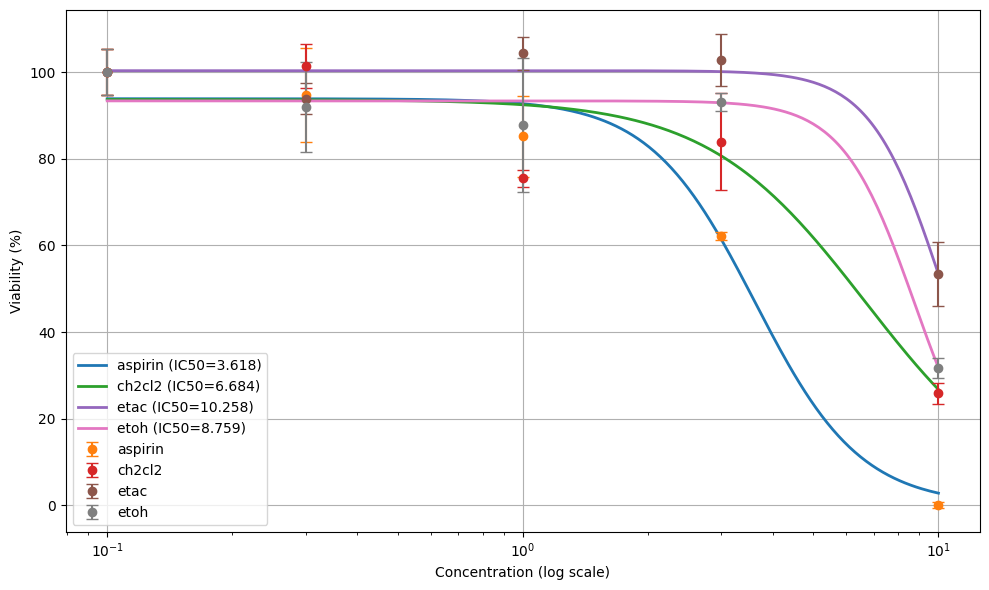

aspirin: y = 0.000 + (93.860-0.000)/[1+(x/3.6182)^3.416]
ch2cl2: y = 0.000 + (93.682-0.000)/[1+(x/6.6843)^2.278]
etac: y = 0.000 + (100.327-0.000)/[1+(x/10.2583)^5.000]
etoh: y = 0.000 + (93.357-0.000)/[1+(x/8.7595)^5.000]


In [21]:
from scipy.optimize import curve_fit

def sigmoid_4pl(x, bottom, top, ic50, hill):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill)

df = pd.concat(viability_sd_list, ignore_index=True)
df["con"] = df["con"].replace(0, 0.1)

equations = {}

plt.figure(figsize=(10,6))

for substance, subdf in df.groupby("substance"):

    subdf = subdf.sort_values("con")
    x = subdf["con"].values
    y = subdf["Day1"].values
    yerr = subdf["SD1"].values

    # initial guess (ดีขึ้น)
    p0 = [10, 100, np.median(x), 1]

    # bounds ป้องกัน IC50 เพี้ยน
    bounds = (
        [0,   50,   min(x)/10, 0.01],      # bottom, top, IC50 low bound, Hill
        [50, 150,   max(x)*10, 5]          # bottom, top, IC50 high bound, Hill
    )

    try:
        popt, pcov = curve_fit(
            sigmoid_4pl,
            x, y,
            p0=p0,
            bounds=bounds,
            maxfev=20000
        )

        bottom, top, ic50, hill = popt

        x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 300)
        y_fit = sigmoid_4pl(x_fit, *popt)

        plt.plot(x_fit, y_fit, linewidth=2, label=f"{substance} (IC50={ic50:.3f})")

        eq = (
            f"{substance}: y = {bottom:.3f} + ({top:.3f}-{bottom:.3f})"
            f"/[1+(x/{ic50:.4f})^{hill:.3f}]"
        )
        equations[substance] = eq

    except Exception as e:
        print(f"{substance}: Fit failed → {e}")

    plt.errorbar(x, y, yerr=yerr, fmt="o", capsize=4, markersize=6, label=substance)

plt.xscale("log")
plt.xlabel("Concentration (log scale)")
plt.ylabel("Viability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print all equations
for key, val in equations.items():
    print(val)
